# Prova 1

### Importação de bibliotecas

In [3]:
import numpy as np
import math
import sympy as sy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<hr>

## Questão 1
As duas expressões a seguir podem ser usadas para calcular a abscissa da interseção da reta, que passa pelos pontos ($x_0$ , $y_0$ ) e ($x_1$ , $y_1$) , com o eixo $x$.

- Algoritmo 1
$$x = \frac{x_0y_1 - x_1y_0}{y_1 - y_0}$$

- Algoritmo 2
$$x = x_0 - \frac{(x_1 - x_0)y_0}{y_1 - y_0}$$

Considere os pontos A = (1.31, 3.24) e B = (1.93, 4.76):

  a) Encontre o valor da abscissa da interseção da reta, que passa por A e B, com o eixo x, usando um dos algoritmos acima.

In [2]:
'''
    Utilizaremos aqui o Algoritmo 1
    pX aqui equivale à um ponto com duas coordenadas, representada por uma tupla (x, y)
    x0 = p0[0]
    y0 = p0[1]
    x1 = p1[0]
    y1 = p1[1]
'''
def f(p0: tuple, p1: tuple):
    return (p0[0]*p1[1] - p1[0]*p0[1])/(p1[1] - p0[1])

a = (1.31, 3.24)
b = (1.93, 4.76)

print(f(a, b))

-0.011578947368421534


b) Considere o sistema de ponto flutuante F= F(10,3,-3,3), encontre o valor da abscissa da interseção da reta, que passa por A e B, com o eixo x, usando o algoritmo (I).

In [3]:
# Teremos de fazer as contas envolvidas uma por vez, fazendo os arrendondamentos quando necessários
print(f'x0*y1\nOriginal: {a[0] * b[1]}\nNo sistema: {format(a[0] * b[1], ".3g")}\n')
print(f'x1*y0\nOriginal: {b[0] * a[1]}\nNo sistema: {format(b[0] * a[1], ".3g")}\n')
print(f'x0*y1 - x1*y0\nOriginal: {a[0]*b[1] - b[0]*a[1]}\nNo sistema: {format(6.24 - 6.25, ".3g")}\n')
print(f'y1 - y0\nOriginal: {b[1] - a[1]}\nNo sistema: {format(b[1] - a[1], ".3g")}\n')
print(f'Resultado\nOriginal: {f(a, b)}\nNo sistema: {format((-0.01/1.52), ".3g")}\n')

x0*y1
Original: 6.2356
No sistema: 6.24

x1*y0
Original: 6.2532000000000005
No sistema: 6.25

x0*y1 - x1*y0
Original: -0.017600000000000726
No sistema: -0.01

y1 - y0
Original: 1.5199999999999996
No sistema: 1.52

Resultado
Original: -0.011578947368421534
No sistema: -0.00658



c) Considere o sistema de ponto flutuante F= F(10,3,-3,3), encontre o valor da abscissa da interseção da reta, que passa por A e B, com o eixo x, usando o algoritmo (II).

In [4]:
# Teremos de fazer as contas envolvidas uma por vez, fazendo os arrendondamentos quando necessários
print(f'x1 - x0\nOriginal: {b[0] - a[0]}\nNo sistema: {format(b[0] - a[0], ".3g")}\n')
print(f'(x1 - x0)y0\nOriginal: {(b[0] - a[0])*a[1]}\nNo sistema: {format(0.62 * a[1], ".3g")}\n')
print(f'y1 - y0\nOriginal: {b[1] - a[1]}\nNo sistema: {format(b[1] - a[1], ".3g")}\n')
print(f'(x1-x0)y0 / (y1-y0)\nOriginal: {((b[0] - a[0])*a[1])/(b[1] - a[1])}\nNo sistema: {format(2.01/1.52, ".3g")}\n')
print(f'Resultado\nOriginal: {f(a, b)}\nNo sistema: {format(a[0] -1.32, ".3g")}\n')

x1 - x0
Original: 0.6199999999999999
No sistema: 0.62

(x1 - x0)y0
Original: 2.0088
No sistema: 2.01

y1 - y0
Original: 1.5199999999999996
No sistema: 1.52

(x1-x0)y0 / (y1-y0)
Original: 1.3215789473684214
No sistema: 1.32

Resultado
Original: -0.011578947368421534
No sistema: -0.01



d) Compare os resultados obtidos nos itens (b) e (c) com o resultado obtido no item (a). Comente.

In [5]:
print(f'Diferença Algoritmo 1: {np.abs(f(a, b)) - np.abs(-0.00658)}')
print(f'Diferença Algoritmo 2: {np.abs(f(a, b)) - np.abs(-0.01)}')

Diferença Algoritmo 1: 0.004998947368421534
Diferença Algoritmo 2: 0.0015789473684215335


**Resposta:** Como podemos observar, o Algoritmo 2 foi capaz de obter um resultado mais próximo do real apesar de fazer uso do mesmo sistema de ponto flutuante, o que nos indica que é um algoritmo com uma maior estabilidade numérica em relação ao Algoritmo 1

<hr>

## Questão 2
Você já se perguntou como o computador calcula funções como seno e cosseno? Computadores antigos usavam tabelas armazenadas na memória, isto é, para um determinado ângulo existia um valor pré-determinado para uma função trigonométrica associada ao mesmo. Nos dias de hoje os computadores usam outra técnica. Matematicamente pode ser mostrado que $sen(x)$, por exemplo, é a soma de uma série infinita (chamada de série de Taylor) como especificada a seguir.
$$\text{sen}(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \frac{x^9}{9!}$$
Use a série de Taylor para calcular $sen(K)$ em um sistema de ponto flutuante F= F(10,5,-10,10). Compare com o valor exato do $sen(K)$, e justifique possíveis erros.

In [6]:
from math import factorial as fac

Primeiro, definiremos uma função auxiliar que nos ajudará a colocar um dado número na quantidade de número significativos estipulada:

In [7]:
def fl(number):
    return float(format(number, '.5g'))

E agora, criaremos a função que calculará o seno como descrito na função do enunciado:

In [8]:
def sen(x):
    return x - x**3/fac(3) + x**5/fac(5) - x**7/fac(7) + x**9/fac(9)

E criaremos a mesma função, mas agora de acordo com o sistema de ponto flutuante proposto.

In [9]:
def floatingSen(x):
    return fl(fl(x) - fl(fl(fl(x**3)/fl(fac(3))) + fl(fl(fl(x**5)/fl(fac(5))) - fl(fl(fl(x**7)/fl(fac(7))) + fl(fl(x**9)/fl(fac(9)))))))

Como o K é dado em graus, devemos fazer a devida conversão para radiano para que nossa função funcione

In [12]:
angle = 13 * np.pi/180
print(f'Seno com sistema de ponto flutuante definido: {floatingSen(angle)}')
print(f'Seno com série de taylor:                     {sen(angle)}')
print(f'Seno com NumPy:                               {np.sin(angle)}')


Seno com sistema de ponto flutuante definido: 0.22494
Seno com série de taylor:                     0.22495105434386706
Seno com NumPy:                               0.224951054343865


**Resposta:** Há dois fatores principais que podemos evidenciar como responsáveis pelo erro em nossa aproximação. Um deles, porém menor, é o fato de estarmos utilizando um pequeno número de termos da série de Taylor. Já o outro, e principal fator, é o nosso sistema de ponto flutuante, tal sistema que não consegue lidar com números grandes - que aparecem frequentemente na série de Taylor, devido às operações exponenciais e fatoriais-, visto que só podemos ter 5 dígitos significativos.

<hr>

## Questão 3
Resolva numericamente a inequação
$$e^{-x^2} < 2x$$
usando TODOS os quatro métodos estudados (Bissecção, Posição Falsa, Newton e Secante). Compare os resultados da quarta iteração com a raiz exata ξ = 0.4194, através do erro relativo. Apresente o passo a passo do método aplicado (Fase I e Fase II)

### Fase 1

In [126]:
def f(x):
    return np.e**(-x**2) - 2*x

x_real = 0.4194

Vamos plotar o gráfico, para poder ter uma ideia do intervalo na qual a raíz está contida

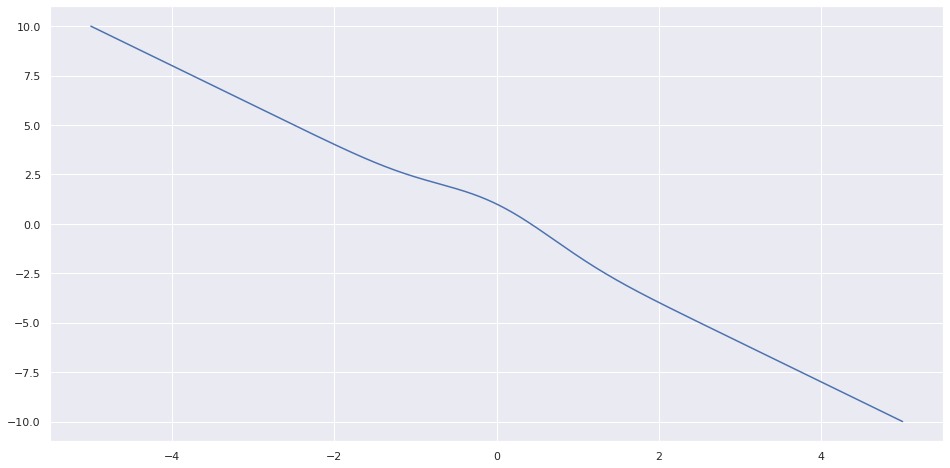

In [127]:
x = np.linspace(-5, 5, 1000)
y = np.e**(-x**2) - 2*x

plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
plt.plot(x,y)
plt.show()

Como podemos observar, a raíz encontra-se no intervalo (0, 1)

In [128]:
interval = (0, 1)

### Fase 2

Começaremos pelos métodos dependentes de um intervalo, que usam um método de busca igual, portanto iremos definí-lo agora:

In [129]:
def search(method, interval: tuple, data: list, epsilon=0.00001):
    x = interval[0]
    data.append({'x': x, 'f(x)': f(x), 'abs_err': np.abs(x - x_real), 'rel_err': np.inf})

    while np.abs(f(x)) > epsilon and np.abs(data[-1]['rel_err']) > epsilon:
        x = method(interval)
        abs_err = np.abs(x - x_real)
        rel_err = abs_err/x
        data.append({'x': x, 'f(x)': f(x), 'abs_err': abs_err, 'rel_err': rel_err})
        interval = (x if f(x)*f(interval[1]) < 0 else interval[0], x if f(x)*f(interval[0]) < 0 else interval[1])
    return x

- Bisseção

In [130]:
def bissection(interval: tuple):
    return (interval[0] + interval[1])/2

In [131]:
data = []
search(bissection, interval, data)
print(f'x = {data[-1]["x"]}')
pd.DataFrame(data)

x = 0.41936492919921875


,x,f(x),abs_err,rel_err
0,0.000000,1.000000e+00,0.419400,inf
1,0.500000,-2.211992e-01,0.080600,0.161200
2,0.250000,4.394131e-01,0.169400,0.677600
3,0.375000,1.188151e-01,0.044400,0.118400
4,0.437500,-4.920296e-02,0.018100,0.041371
5,0.406250,3.536058e-02,0.013150,0.032369
6,0.421875,-6.789595e-03,0.002475,0.005867
7,0.414062,1.431928e-02,0.005337,0.012891
8,0.417969,3.773179e-03,0.001431,0.003424
9,0.419922,-1.506138e-03,0.000522,0.001243


- Falsa Posição

In [132]:
def false_position(interval: tuple):
    return (interval[0]*f(interval[1]) - interval[1]*f(interval[0]))/(f(interval[1])-f(interval[0]))

In [133]:
data = []
search(false_position, interval, data)
print(f'x = {data[-1]["x"]}')
pd.DataFrame(data)

x = 0.4193623080694892


,x,f(x),abs_err,rel_err
0,0.000000,1.000000,0.419400,inf
1,0.379922,0.105749,0.039478,0.103911
2,0.417654,0.004625,0.001746,0.004182
3,0.419299,0.000178,0.000101,0.000241
4,0.419362,0.000007,0.000038,0.000090


- Secante

In [69]:
def sec(x_i, x_j):
    return (x_i*f(x_j) - x_j*f(x_i))/(f(x_j)-f(x_i))

In [70]:
def iterate(f, x, x0, data:list, epsilon=0.000001):
    data.append({'x': x0, 'f(x)': f(x0), 'abs_err': np.abs(x - x_real), 'rel_err': np.inf})

    data.append({'x': x, 'f(x)': f(x), 'abs_err': np.abs(x - x_real), 'rel_err': np.abs(x - x_real)/x})

    while np.abs(f(x)) > epsilon:
        x = sec(data[len(data)-2]['x'], data[-1]['x'])
        abs_err = np.abs(x - x_real)
        rel_err = abs_err/x
        data.append({'x': x, 'f(x)': f(x), 'abs_err': abs_err, 'rel_err': rel_err})

    return x

In [131]:
data = []
iterate(0.1, 0, data)
print(f'x = {data[-1]["x"]}')
pd.DataFrame(data)

x = 0.41936487738290595


,x,f(x),abs_err,rel_err
0,0.000000,1.000000e+00,0.319400,inf
1,0.100000,7.900498e-01,0.319400,3.194000
2,0.476304,-1.555787e-01,0.056904,0.119469
3,0.414393,1.342895e-02,0.005007,0.012084
4,0.419312,1.432935e-04,0.000088,0.000210
5,0.419365,-1.442672e-07,0.000035,0.000084


- Newton-Raphson
  
Aqui precisaremos de outra definição para todas as funções, já será necessário lidar com a biblioteca `sympy` para as derivadas

In [22]:
x = sy.Symbol('x')
f = math.e**(-x**2) - 2*x

In [13]:
def newtonian(xk):
    return xk - f.subs(x, xk).evalf()/f.diff(x).subs(x, xk).evalf()

In [14]:
def iterate(f, x0, data:list, epsilon=0.000001):
    xk = x0
    f_x = f.subs(x, xk).evalf()
    data.append({'x': xk, 'f(x)': f_x, 'abs_err': np.abs(xk - x_real), 'rel_err': np.inf})
    # print(data[-1])

    while np.abs(f_x) > epsilon:
        xk = newtonian(xk)
        f_x = f.subs(x, xk).evalf()
        abs_err = np.abs(xk - x_real)
        rel_err = abs_err/xk
        data.append({'x': xk, 'f(x)': f_x, 'abs_err': abs_err, 'rel_err': rel_err})

    return xk

In [116]:
data = []
iterate(0)
print(f'x = {data[-1]["x"]}')
pd.DataFrame(data)

x = 0.419365037942745


,x,f(x),abs_err,rel_err
0,0,1.00000000000000,0.4194,inf
1,0.500000000000000,-0.221199216928595,0.0806000000000000,0.161200000000000
2,0.420397598030002,-0.00279265015292463,0.000997598030002045,0.00237298698821502
3,0.419365037942745,-5.78335541456809e-7,3.49620572553389e-5,8.33690319699759e-5


<hr>

## Questão 4
Uma indústria consome energia elétrica de duas usinas fornecedoras. O custo de fornecimento em reais por hora como função da potência consumida em quilowatt é dada pelas
seguintes funções:
$$C_1(x) = 500 + 0.13x + 4.1*10^{-5}x^2 + 2.1*10^{-7}x^3 + 4.13*10^{-10}x^4$$
$$C_2(x) = 1000 + 0.22x + 6.13*10^{-5}x^2 + 8.13*10^{-7}x^3$$
Onde C1 e C2 são os custos de fornecimento das usinas 1 e 2, respectivamente. Calcule o custo mínimo da energia elétrica quando a potência total consumida é de 1500 kilowatt.

**Resposta:** Sabendo que a potência total consumida equivale à soma do consumo das duas usinas, podemos concluir que:
$$C_{total} = C_1(x) + C_2(1500 - x)$$
Logo, nos resta encontrar a raíz da derivada dessa função, a fim de encontrar o mínimo global, que equivale à seguinte função:
$$C'_{total} = \frac{413x^3 - 452250x^2 + 18804*10^{5}x - 14404125*10^{5}}{25*10^{10}}$$
Primeiro, iremos fazer uma iteração com baixa precisão a fim de encontrar um mínimo aproximado e podermos definir o intervalo em que faremos nossa busca

In [66]:
def c1(x):
    return 500 + 0.13*x + 4.1*10**(-5)*x**2 + 2.1*10**(-7)*x**3 + 4.13*10**-10*x**4

def c2(x):
    return 1000 + 0.22*x + 6.13*10**(-5)*x**2 + 8.13*10**(-7)*x**3

min = np. inf
last = -1
for i in np.arange(0, 1500, 0.001):
    if c1(i) + c2(1500-i) < min:
        min = c1(i) + c2(1500-i)
        last = i

print(f'x ≈ {last}')

x ≈ 807.205


Agora, podemos considerar que a raíz se encontra dentro do intervalo (807, 808). Iremos utilizar o método da bissessão visto que ele **sempre** converge

In [59]:
def bissection(interval: tuple):
    return (interval[0] + interval[1])/2

def iterate(f, method, interval: tuple, data:list, epsilon=1e-7):
    x = interval[0]
    data.append({'x': x, 'f(x)': f(x), 'abs_err': None, 'rel_err': None})

    while np.abs(f(x)) > epsilon:
        x = method(interval)
        abs_err = np.abs(data[-1]['x'] - x)
        rel_err = abs_err/data[-1]['x']
        data.append({'x': x, 'f(x)': f(x), 'abs_err': abs_err, 'rel_err': rel_err})
        interval = (x if f(x)*f(interval[1]) < 0 else interval[0], x if f(x)*f(interval[0]) < 0 else interval[1])
    return x

In [56]:
def c_t(x):
    return (413*x**3 - 452250*x**2 + 1880400000*x - 1440412500000)/250000000000

In [60]:
data = []
iterate(c_t, bissection, (807, 808), data)
print(f'x = {data[-1]["x"]}')
pd.DataFrame(data)

x = 807.2051696777344


,x,f(x),abs_err,rel_err
0,807.000000,-1.606519e-03,NaN,NaN
1,807.500000,2.308761e-03,0.500000,6.195787e-04
2,807.250000,3.509838e-04,0.250000,3.095975e-04
3,807.125000,-6.278019e-04,0.125000,1.548467e-04
4,807.187500,-1.384176e-04,0.062500,7.743534e-05
5,807.218750,1.062809e-04,0.031250,3.871467e-05
6,807.203125,-1.606889e-05,0.015625,1.935659e-05
7,807.210938,4.510589e-05,0.007812,9.678481e-06
8,807.207031,1.451847e-05,0.003906,4.839194e-06
9,807.205078,-7.752182e-07,0.001953,2.419609e-06


In [61]:
def c_total(x):
    return 500 + 0.13*x + 4.1*10**(-5)*x**2 + 2.1*10**(-7)*x**3 + 4.13*10**-10*x**4 + 1000 + 0.22*(1500-x) + 6.13*10**(-5)*(1500-x)**2 + 8.13*10**(-7)*(1500-x)**3

In [68]:
print(f'O custo mínimo para um consumo de 1500 kW é de {c_total(807.2051696777344)} R$/h')

O custo mínimo para um consumo de 1500 kW é de 2369.617817137766 R$/h


<hr>

## Questão 5
Deformação de pneus - Quando o pneu fica livre para se mover para cima e para baixo excessivamente, um movimento rítmico se desenvolve e dá início a um padrão de desgaste
com espaçamento uniforme. Diferentemente das condições de um pneu balanceado, a frequência do padrão de desgaste é maior em pequenos movimentos do pneu que **não estão sendo amortecidos por molas ou amortecedores desgastados**. Conforme a condição se agrava, ocorrem ruídos e a perda de tração além, claro, do desgaste do pneu.

A função abaixo modela o deslocamento do pneu (mm) em função do tempo (s) na direção vertical.
$$s(t) = e^{\frac{-t}{13}} + t\cos(2t)$$

In [14]:
def s(t):
    return np.e**(-t/13) + t*np.cos(2*t)

a) Construa o gráfico que modela este fenômeno

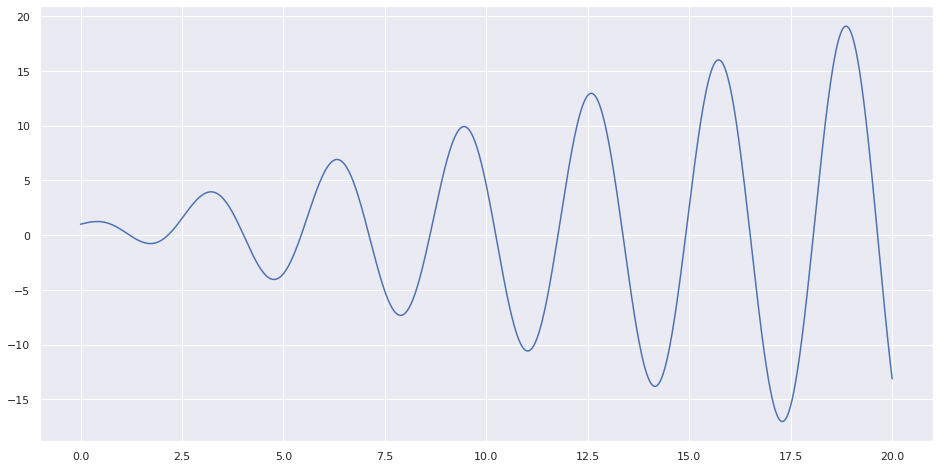

In [105]:
x = np.linspace(0, 20, 1000)
y = np.e**(-x/13) + x*np.cos(2*x)

plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
plt.plot(x,y)
plt.show()

b) Utilize **dois métodos iterativos** para encontrar o tempo de **deslocamento máximo**, logo após decorridos 15s. Considere uma precisão de 10-7 e os dois critérios de convergência.

**Resposta:** Como podemos observar no gráfico, há um pico logo em frente aos 15s, e o seu valor representaria o deslocamento máximo logo após os 15s. Então para encontrar o tempo em que ele se dá, devemos encontrar quando a derivada após 15s se equivale a 0, o que nos indicaria um ponto de máximo local na função
$$s'(t) = -2t\sin\left(2t\right)+\cos\left(2t\right)+\dfrac{\mathrm{e}^\frac{t}{13}}{13}$$

In [23]:
def s_(t):
    return -2*t*np.sin(2*t) + np.cos(2*t) + np.e**(t/13)/13

### Newton

In [1]:
def newtonian(xk):
    return xk - f.subs(x, xk).evalf()/f.diff(x).subs(x, xk).evalf()

def iterate(x0, data, epsilon=1e-7):
    xk = x0
    f_x = f.subs(x, xk).evalf()
    data.append({'x': xk, 'f(x)': f_x, 'abs_err': np.inf, 'rel_err': np.inf})

    while np.abs(f_x) > epsilon and np.abs(data[-1]['rel_err']) > epsilon:
        xk = newtonian(xk)
        f_x = f.subs(x, xk).evalf()
        abs_err = np.abs(data[-1]['x'] - xk)
        rel_err = abs_err/data[-1]['x']
        data.append({'x': xk, 'f(x)': f_x, 'abs_err': abs_err, 'rel_err': rel_err})

    return xk

In [22]:
x = sy.Symbol('x')
f = -2*x*sy.sin(2*x) + sy.cos(2*x) + np.e**(x/13)/13

In [9]:
data = []
iterate(16, data)
print(f'x = {data[-1]["x"]}')
pd.DataFrame(data)

x = 15.7234929757978


,x,f(x),abs_err,rel_err
0,16,-16.8338971948962,inf,inf
1,15.6972008786294,1.65247752011983,0.302799121370557,0.0189249450856598
2,15.7235619010444,-0.00434137017965397,0.0263610224149868,0.00167934542080527
3,15.7234929757978,-1.91843864127961e-8,6.89252466088419e-5,4.38356442659876e-6


### Secante

In [31]:
def sec(f, x_i, x_j):
    return (x_i*f(x_j) - x_j*f(x_i))/(f(x_j)-f(x_i))


def iterate(f, x, x0, data, epsilon=1e-7):
    data.append({'x': x0, 'f(x)': f(x0), 'abs_err': np.inf, 'rel_err': np.inf})
    data.append({'x': x, 'f(x)': f(x), 'abs_err': np.inf, 'rel_err': np.inf})

    while np.abs(f(x)) > epsilon:
        x = sec(f, data[len(data)-2]['x'], data[-1]['x'])
        abs_err = np.abs(data[-1]['x'] - x)
        rel_err = abs_err/data[-1]['x']
        data.append({'x': x, 'f(x)': f(x), 'abs_err': abs_err, 'rel_err': rel_err})

    return x

In [32]:
data = []
iterate(s_, 16.1, 16, data)
print(f'x = {data[-1]["x"]}')
pd.DataFrame(data)

x = 15.72795086341146


,x,f(x),abs_err,rel_err
0,16.000000,-1.654806e+01,inf,inf
1,16.100000,-2.176521e+01,inf,inf
2,15.682814,2.832728e+00,4.171858e-01,2.591216e-02
3,15.730858,-1.831719e-01,4.804362e-02,3.063456e-03
4,15.727940,6.918061e-04,2.917950e-03,1.854921e-04
5,15.727951,1.071799e-07,1.097908e-05,6.980623e-07
6,15.727951,-1.275646e-13,1.701228e-09,1.081659e-10


A fim de checar se o ponto encontrado se situa de fato no pico em que imaginamos, faremos um plot do ponto.

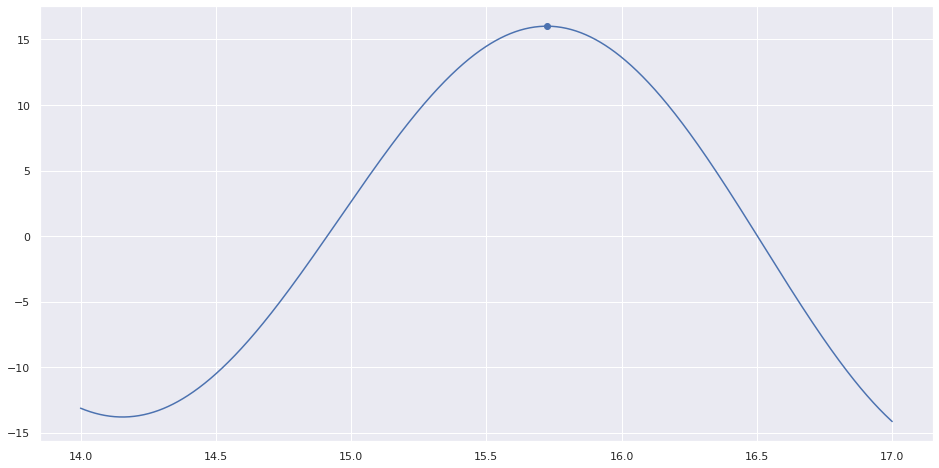

In [27]:
x = np.linspace(14, 17, 1000)
y = np.e**(-x/13) + x*np.cos(2*x)

plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
plt.scatter([15.7234929757978], [s(15.7234929757978)])
plt.plot(x,y)
plt.show()

Como podemos ver, ele se encaixa exatamente em cima do pico!

c) Compare o tempo e deslocamento encontrado por cada método.

- Newton

In [28]:
s(15.7234929757978)

16.014256035004745

- Secante

In [29]:
s(15.72795086341146)

16.01363006586434

- Diferença entre deslocamentos encontrados por cada método

In [30]:
#s(newton) - s(secante)
16.014256035004745 - 16.01363006586434

0.0006259691404046919

**Resposta:** Comparando os métodos, podemos ver que houve uma pequena diferença encontrada entre os tempos encontrados. O método de Newton se mostrou mais eficiente, uma vez que necessitou de menos iterações para conseguir convergir e também conseguiu um valor de deslocamento mais alto comparado ao método da secante.